# Data Collection

This is done in another notebook.

## Load Data


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = 'data'
import os
# check if path exists
if not os.path.exists(path):
    os.makedirs(path)
# load data-6hour-north-atlantic-2.nc
data_nc = xr.open_dataset(f'{path}/data-6hour-north-atlantic-2.nc')
# print(data_nc)
print(data_nc.dims)
print(data_nc.coords)
print(data_nc.data_vars)
# print the shape of the data_nc
print(data_nc.sst.shape)

Frozen(SortedKeysDict({'longitude': 41, 'latitude': 41, 'expver': 2, 'time': 10020}))
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-11-09T18:00:00
Data variables:
    sst      (time, expver, latitude, longitude) float32 ...
(10020, 2, 41, 41)


In [3]:
data_nc.time.values.shape

(10020,)

In [4]:
data_nc.sst.values.shape

(10020, 2, 41, 41)

In [5]:
# convert data_nc to numpy array
data_nc_np = data_nc.sst.values
print(data_nc_np.shape)
data_raw = data_nc_np[:, 0, :, :]
print(data_raw.shape)

(10020, 2, 41, 41)
(10020, 41, 41)


In [6]:
data_nc.sst

<xarray.DataArray 'sst' (time: 10020, expver: 2, latitude: 41, longitude: 41)>
array([[[[      nan, ...,       nan],
         ...,
         [      nan, ..., 294.7917 ]],

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [287.72827, ..., 287.72827]],

        [[287.72827, ..., 287.72827],
         ...,
         [287.72827, ..., 287.72827]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-11-09T18:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [7]:
# reshape data_raw to (data_raw.shape[0], data_raw.shape[1]*data_raw.shape[2])
data_raw = data_raw.reshape(data_raw.shape[0], data_raw.shape[1]*data_raw.shape[2])
print(data_raw.shape)

(10020, 1681)


In [8]:
# save data_raw to data/data_raw.npy
np.save('data/data_raw.npy', data_raw)


In [9]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

from pandas import concat
import numpy as np
six_hour_sequence = {}
for i in range(0, data_raw.shape[1]):
    # get the sequence length of each variable
    sequence_length = data_raw.shape[0]
    # convert the data to a supervised learning problem
    data = series_to_supervised(data_raw[:, i].reshape(data_raw[:, i].shape[0], 1), n_in=10, n_out=5, dropnan=True)
    # add the variable to the dictionary
    six_hour_sequence[i] = data
    # print the shape of the data
    print(data.shape)


(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)


In [10]:
# combine values of dictionary into one numpy array if the values are not empty
data_combined = np.empty((0, six_hour_sequence[0].shape[1]))
for i in range(0, data_raw.shape[1]):
    if six_hour_sequence[i].shape[0] != 0:
        data_combined = np.append(data_combined, six_hour_sequence[i], axis=0)
        print(data_combined.shape)


(4035, 15)
(8070, 15)
(12105, 15)
(16140, 15)
(20175, 15)
(24210, 15)
(28245, 15)
(32280, 15)
(36315, 15)
(40350, 15)
(44385, 15)
(48420, 15)
(52455, 15)
(56490, 15)
(60525, 15)
(64560, 15)
(68595, 15)
(72630, 15)
(76665, 15)
(80700, 15)
(84735, 15)
(88770, 15)
(92805, 15)
(96840, 15)
(100875, 15)
(104910, 15)
(108945, 15)
(112980, 15)
(117015, 15)
(121050, 15)
(125085, 15)
(129120, 15)
(133155, 15)
(137190, 15)
(141225, 15)
(145260, 15)
(149295, 15)
(153330, 15)
(157365, 15)
(161400, 15)
(165435, 15)
(169470, 15)
(173505, 15)
(177540, 15)
(181575, 15)
(185610, 15)
(189645, 15)
(193680, 15)
(197715, 15)
(201750, 15)
(205785, 15)
(209820, 15)
(213855, 15)
(217890, 15)
(221925, 15)
(225960, 15)
(229995, 15)
(234030, 15)
(238065, 15)
(242100, 15)
(246135, 15)
(250170, 15)
(254205, 15)
(258240, 15)
(262275, 15)
(266310, 15)
(270345, 15)
(274380, 15)
(278415, 15)
(282450, 15)
(286485, 15)
(290520, 15)
(294555, 15)
(298590, 15)
(302625, 15)
(306660, 15)
(310695, 15)
(314730, 15)
(318765, 15)

In [11]:
print(data_combined.shape)
# print the first row of the data_combined
print(data_combined[0])

(3066828, 15)
[277.41766357 277.41766357 277.41766357 277.41766357 278.21456909
 278.21456909 278.21456909 278.21456909 278.43252563 278.43252563
 278.43252563 278.43252563 278.01248169 278.01248169 278.01248169]


In [12]:
# save 100000 rows of data_combined to data/data_combined.npy
np.save('data/data_combined.npy', data_combined[:100000])

In [13]:
# get the memory usage of data_combined
print(data_combined[:100000].nbytes)

12000000


# Run Time Series Clustering using DeTSEC 

## Data Collection and Transformation

In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
# load data_combined
data_combined = np.load('data/data_combined.npy')
# preprocess.normalize the data_combined
data_combined_normalized = preprocessing.normalize(data_combined)
# save the normalized data to data/data_normalized.npy
np.save('data/data_normalized.npy', data_combined_normalized)

file = "data/data_normalized.npy"
# np.save(file, data)
lis = [data_combined_normalized.shape[1]] * data_combined_normalized.shape[0]
seq_length = np.array(lis)
seq_file = "data/seq_length.npy"
np.save(seq_file, seq_length)

In [15]:
# save the data_combined.npy, data_normalized.npy, seq_length.npy to google cloud storage
# gsutil cp data/data_combined.npy gs://sst-forecasting/data_combined.npy
# gsutil cp data/data_normalized.npy gs://sst-forecasting/data_normalized.npy
# gsutil cp data/seq_length.npy gs://sst-forecasting/seq_length.npy
import os
os.system('gsutil cp data/data_combined.npy gs://sst-forecasting/data_combined.npy')
os.system('gsutil cp data/data_normalized.npy gs://sst-forecasting/data_normalized.npy')
os.system('gsutil cp data/seq_length.npy gs://sst-forecasting/seq_length.npy')



256

In [16]:
# print the location of the data_combined.npy, data_normalized.npy, seq_length.npy in google cloud storage
# gsutil ls gs://sst-forecasting
import os
os.system('gsutil ls gs://sst-forecasting')

256

### Load the data from google cloud storage

In [17]:
# # load the data from google cloud storage
# # gsutil cp gs://sst-forecasting/data_combined.npy data/data_combined.npy
# # gsutil cp gs://sst-forecasting/data_normalized.npy data/data_normalized.npy
# # gsutil cp gs://sst-forecasting/seq_length.npy data/seq_length.npy
# import os
# os.system('gsutil cp gs://sst-forecasting/data_combined.npy data/data_combined.npy')
# os.system('gsutil cp gs://sst-forecasting/data_normalized.npy data/data_normalized.npy')
# os.system('gsutil cp gs://sst-forecasting/seq_length.npy data/seq_length.npy')


## Libraries

In [18]:
import sys
import os
import numpy as np
import math
from operator import itemgetter, attrgetter, methodcaller
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
# from tensorflow.contrib.rnn import DropoutWrapper
import time
import calendar
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
# from tensorflow.contrib import rnn
from scipy.spatial import distance
from operator import itemgetter
import random as rand
from sklearn.cluster import KMeans
from tensorflow.compat.v1.nn.rnn_cell import DropoutWrapper
from tensorflow.compat.v1.nn import rnn_cell as rnn
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

## Functions required for clustering

In [20]:
def buildMaskBatch(batch_seql, max_size):
    mask_batch = []
    for el in batch_seql:
        mask_batch.append(  np.concatenate( (np.ones(el), np.zeros(max_size - el)) ) )
    return np.array(mask_batch)

def extractFeatures(ts_data, seq_length, mask_val):
    batchsz = 1024
    iterations = int(ts_data.shape[0] / batchsz)
    if ts_data.shape[0] % batchsz != 0:
        iterations+=1
    features = None

    for ibatch in range(iterations):
        batch_data, batch_seqL = getBatch(ts_data, seq_length, ibatch, batchsz)
        batch_mask, _ = getBatch(mask_val, mask_val, ibatch, batchsz)
        partial_features = sess.run(embedding,feed_dict={input_t:batch_data, seqL:batch_seqL, mask: batch_mask})
        if features is None:
            features = partial_features
        else:
            features = np.vstack((features, partial_features))

        del batch_data
        del batch_mask
    return features

def gate(vec):
    mask = tf.compat.v1.layers.dense(vec, vec.get_shape()[1], activation=tf.sigmoid)
    return mask

def gating(outputs_list, mask):
    gating_results = None
    if mask is None:
        for i in range(len(outputs_list)):
            val = outputs_list[i]
            multiplication = val * gate(val)
            if gating_results is None:
                gating_results = multiplication
            else:
                gating_results = gating_results + multiplication
        return gating_results

    for i in range(len(outputs_list)):
        val = outputs_list[i]
        multiplication = val * gate(val)
        multiplication = tf.compat.v1.transpose( multiplication )
        multiplication = multiplication * mask[:,i]
        multiplication = tf.compat.v1.transpose( multiplication )
        if gating_results is None:
            gating_results = multiplication
        else:
            gating_results = gating_results +multiplication

    return gating_results

def attention(outputs_list, nunits, attention_size):
    outputs = tf.stack(outputs_list, axis=1)

    # Trainable parameters
    W_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([nunits, attention_size], stddev=0.1))
    b_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([attention_size], stddev=0.1))
    u_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([attention_size], stddev=0.1))

    # Applying fully connected layer with non-linear activation to each of the B*T timestamps;
    #  the shape of `v` is (B,T,D)*(D,A)=(B,T,A), where A=attention_size
    v = tf.compat.v1.tanh(tf.compat.v1.tensordot(outputs, W_omega, axes=1) + b_omega)
    # For each of the timestamps its vector of size A from `v` is reduced with `u` vector
    vu = tf.compat.v1.tensordot(v, u_omega, axes=1)   # (B,T) shape
    alphas = tf.compat.v1.nn.softmax(vu)              # (B,T) shape also

    output = tf.compat.v1.reduce_sum(outputs * tf.compat.v1.expand_dims(alphas, -1), 1)
    output = tf.compat.v1.reshape(output, [-1, nunits])
    return output

def getBatch(X, Y, i, batch_size):
    start_id = i*batch_size
    end_id = min( (i+1) * batch_size, X.shape[0])
    batch_x = X[start_id:end_id]
    batch_y = Y[start_id:end_id]
    return batch_x, batch_y


def AE3(x, b_size, n_dim, seqL, mask, toReuse):
    with tf.compat.v1.variable_scope("ENCDEC",reuse=toReuse):
        n_splits = x.get_shape()[1] / n_dim
        n_splits = int(n_splits)
        x_list = tf.compat.v1.split(x, n_splits, axis=1)
        x_list_bw = tf.compat.v1.stack(x_list[::-1],axis=1)
        x_list = tf.compat.v1.stack(x_list,axis=1)
        #FIXED TO 512 for big dataset
        #FOR SMALL DATASET WE RECOMMEND 64 OR 32
        nunits = 32
        outputsEncLFW = None
        outputsEncLBW = None

        with tf.compat.v1.variable_scope("encoderFWL", reuse=toReuse):
            cellEncoderFW = rnn.GRUCell(nunits)
            outputsEncLFW,_=tf.compat.v1.nn.dynamic_rnn(cellEncoderFW, x_list, sequence_length = seqL, dtype="float32")

        with tf.compat.v1.variable_scope("encoderBWL", reuse=toReuse):
            cellEncoderBW = rnn.GRUCell(nunits)
            outputsEncLBW,_=tf.compat.v1.nn.dynamic_rnn(cellEncoderBW, x_list_bw, sequence_length = seqL, dtype="float32")

        final_list_fw = []
        for i in range( n_splits ):
            final_list_fw.append( outputsEncLFW[:,i,:] )

        final_list_bw = []
        for i in range( n_splits ):
            final_list_bw.append( outputsEncLBW[:,i,:] )

        encoder_fw = attention(final_list_fw, nunits, nunits)
        encoder_bw = attention(final_list_bw, nunits, nunits)
        encoder = gate(encoder_fw) * encoder_fw + gate(encoder_bw) * encoder_bw

        x_list2decode = []
        x_list2decode_bw = []
        for i in range(n_splits):
            x_list2decode.append( tf.compat.v1.identity(encoder) )
            x_list2decode_bw.append( tf.compat.v1.identity(encoder) )

        x_list2decode = tf.compat.v1.stack(x_list2decode, axis=1)
        x_list2decode_bw = tf.compat.v1.stack(x_list2decode_bw, axis=1)

        with tf.compat.v1.variable_scope("decoderG", reuse=toReuse):
            cellDecoder = rnn.GRUCell(nunits)
            outputsDecG,_=tf.compat.v1.nn.dynamic_rnn(cellDecoder, x_list2decode, sequence_length = seqL, dtype="float32")

        with tf.compat.v1.variable_scope("decoderGFW", reuse=toReuse):
            cellDecoder = rnn.GRUCell(nunits)
            outputsDecGFW,_=tf.compat.v1.nn.dynamic_rnn(cellDecoder, x_list2decode_bw, sequence_length = seqL, dtype="float32")

        out_list = []
        out_list_bw = []
        for i in range(n_splits):
            temp_cell = outputsDecG[:,i,:]
            tt = tf.compat.v1.layers.dense(temp_cell, n_dim, activation=None)
            out_list.append( tt )

            temp_cell2 = outputsDecGFW[:,i,:]
            tt2 = tf.compat.v1.layers.dense(temp_cell, n_dim, activation=None)
            out_list_bw.append(tt2)

        reconstruct = tf.compat.v1.concat(out_list, axis=1)
        reconstruct2 = tf.compat.v1.concat(out_list_bw[::1], axis=1)

        return reconstruct, reconstruct2, encoder

## dirName, n_dims, n_clusters, output_dir, dataFileName, seqLFileName, data, n_row, n_col, seqLength, orig_data, orig_seqLength, n_feat


In [21]:
dirName = "data"
n_dims = 1
n_clusters = 4

output_dir = 'output'
#DATA FILE with size:	(nSamples, (n_dims * max_length) )
dataFileName = dirName+"/data_normalized.npy"
#SEQUENCE LENGTH FILE with size: ( nSamples, )
#It contains the sequence length (multiplied by n_dims) for each sequence with positional reference to the data.npy file
#This means that, if a time series has 4 attributes and it has a lenght equal to 20, the corresponding values in the seq_length.npy file will be 80
seqLFileName = dirName+"/seq_length.npy"

data = np.load(dataFileName)
n_row = data.shape[0]
n_col = data.shape[1]

seqLength = np.load(seqLFileName)

orig_data = data
orig_seqLength = seqLength
n_feat = data.shape[1]


In [22]:
data.shape

(100000, 15)

In [23]:
seqLength.shape

(100000,)

## b_size, dropOut, seqL, input_t, mask, target_t, sess, 

In [24]:
print(tf.__version__)

2.7.0


In [25]:
b_size = tf.compat.v1.placeholder(tf.float32, () , name="b_size")
dropOut = tf.compat.v1.placeholder(tf.float32, () , name="dropOut")
seqL = tf.compat.v1.placeholder(tf.float32, (None) , name="seqL")
input_t = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='inputs')
mask = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='mask')
target_t = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='target_t')

sess = tf.compat.v1.InteractiveSession()

In [26]:
input_t.get_shape()[1]

15

## reconstruction (forward), reconstruction2 (backward), embedding 

In [27]:
reconstruction, reconstruction2, embedding = AE3(input_t, b_size, n_dims, seqL, mask, False)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_we

## b_centroids, loss_fw, loss_bw, cost, opt

In [28]:
b_centroids = tf.compat.v1.placeholder(tf.float32, (None, embedding.get_shape()[1]), name='b_centroids')
loss_fw = tf.compat.v1.square( (target_t - reconstruction) * mask )
loss_fw = tf.compat.v1.reduce_sum(loss_fw, axis=1)

loss_bw = tf.compat.v1.square( (target_t - reconstruction2) * mask )
loss_bw = tf.compat.v1.reduce_sum(loss_bw, axis=1)

cost = tf.compat.v1.reduce_mean(loss_fw) + tf.compat.v1.reduce_mean(loss_bw)  #+ latent_loss
opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [29]:
opt

<tf.Operation 'Adam' type=NoOp>

## CLUSTERING REFINEMENT CENTROIDS

###  loss_crc, cost_crc, opt_crc, batchsz, hm_epochs, iterations, max_length, best_loss, noise_factor, th, new_centroids, kmeans_labels

In [30]:
loss_crc = tf.compat.v1.reduce_sum(tf.square( embedding - b_centroids ), axis=1)
loss_crc = tf.compat.v1.reduce_mean(loss_crc)

cost_crc = loss_crc + cost
opt_crc = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost_crc)

tf.compat.v1.global_variables_initializer().run()

batchsz = 128
hm_epochs = 50

iterations = int(data.shape[0] / batchsz)
max_length = data.shape[1]

if data.shape[0] % batchsz != 0:
    iterations+=1

best_loss = sys.float_info.max
noise_factor = 0.01

th = 20 #number of epochs for the autoencoder pretraining step
new_centroids = None
kmeans_labels = None

loss_crc_list = []
cost_list = []

## Training


In [31]:
for e in range(hm_epochs):
	start = time.time()
	lossi = 0
	data, seqLength = shuffle(data, seqLength, random_state=0)
	costT = 0
	costT2 = 0
	if e < th:
		data, seqLength = shuffle(data, seqLength, random_state=0)
	else:
		mask_val = buildMaskBatch(seqLength, max_length)
		features = extractFeatures(data, seqLength, mask_val)
		kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=random.randint(1,10000000)).fit(features)
		new_centroids = kmeans.cluster_centers_
		kmeans_labels = kmeans.labels_
		embeddings_data = extractFeatures(data, seqLength, mask_val)
		data, seqLength, kmeans_labels = shuffle(data, seqLength, kmeans_labels, random_state=0)

	for ibatch in range(iterations):
		batch_data, batch_seql = getBatch(data, seqLength, ibatch, batchsz)
		mask_batch = buildMaskBatch(batch_seql, batch_data.shape[1])
		cost_L = 0

		#PRETRAINING ENCODER for 50 EPOCHS
		if e < th:
			_, cost_L= sess.run([opt, cost],feed_dict={ input_t:batch_data,
														target_t:batch_data,
														b_size: batch_data.shape[0],
														seqL: batch_seql,
														mask: mask_batch
														})
			cost_C=0
		#COMBINED TRAINING WITH ENCO/DEC + CLUSTERING REFINEMENT
		else:
			batch_km_labels, _ = getBatch(kmeans_labels, kmeans_labels, ibatch, batchsz)
			batch_centroids = []
			for el in batch_km_labels:
				batch_centroids.append( new_centroids[el]  )
			batch_centroids = np.array(batch_centroids)
			_, cost_L, cost_C = sess.run([opt_crc, cost, loss_crc], feed_dict={
													input_t:batch_data,
													target_t:batch_data,
													#centroids: centroids_val,
													b_size: int(batch_data.shape[0]),
													seqL: batch_seql,
													mask: mask_batch,
													b_centroids: batch_centroids
													})

		costT+=cost_L
		costT2+=cost_C
		del batch_data
		del batch_seql
		del mask_batch

	mask_val = buildMaskBatch(seqLength, max_length)
	embedd = extractFeatures(data, seqLength, mask_val)
	kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedd)
	print("Epoch:",e,"| COST_EMB:",costT/iterations," | COST_CRC: ", costT2/iterations)
	cost_list.append(costT/iterations)
	loss_crc_list.append(costT2/iterations)


Epoch: 0 | COST_EMB: 0.34497941725846926  | COST_CRC:  0.0
Epoch: 1 | COST_EMB: 3.7008247211808636e-06  | COST_CRC:  0.0
Epoch: 2 | COST_EMB: 3.644031089595239e-06  | COST_CRC:  0.0
Epoch: 3 | COST_EMB: 3.647169700857573e-06  | COST_CRC:  0.0
Epoch: 4 | COST_EMB: 3.656803738066375e-06  | COST_CRC:  0.0
Epoch: 5 | COST_EMB: 3.668586214014962e-06  | COST_CRC:  0.0
Epoch: 6 | COST_EMB: 3.6826281763200186e-06  | COST_CRC:  0.0
Epoch: 7 | COST_EMB: 3.7245060883998653e-06  | COST_CRC:  0.0
Epoch: 8 | COST_EMB: 3.7672353985905768e-06  | COST_CRC:  0.0
Epoch: 9 | COST_EMB: 3.864065382089965e-06  | COST_CRC:  0.0
Epoch: 10 | COST_EMB: 3.966467367724975e-06  | COST_CRC:  0.0
Epoch: 11 | COST_EMB: 4.029871044268706e-06  | COST_CRC:  0.0
Epoch: 12 | COST_EMB: 4.061930043988473e-06  | COST_CRC:  0.0
Epoch: 13 | COST_EMB: 4.208770013441901e-06  | COST_CRC:  0.0
Epoch: 14 | COST_EMB: 4.15453954698172e-06  | COST_CRC:  0.0
Epoch: 15 | COST_EMB: 4.222920373093754e-06  | COST_CRC:  0.0
Epoch: 16 | COST_

## [Save model](https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/)

In [33]:
saver = tf.compat.v1.train.Saver()
saver.save(sess, 'sst-cluster-model')

'sst-cluster-model'

## Plot Loss

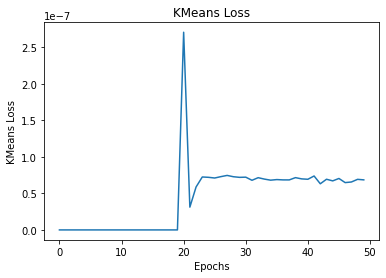

In [34]:
import matplotlib.pyplot as plt
plt.plot(loss_crc_list)
plt.title(f'KMeans Loss')
plt.ylabel('KMeans Loss')
plt.xlabel('Epochs')
plt.savefig(f"KMeans Loss.pdf", dpi = 150)
plt.show()

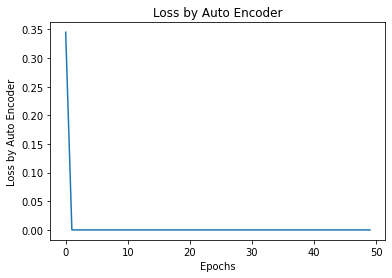

In [35]:
plt.plot(cost_list)
plt.title(f'Loss by Auto Encoder')
plt.ylabel('Loss by Auto Encoder')
plt.xlabel('Epochs')
plt.savefig(f"Loss by Auto Encoder.pdf", dpi = 150)
plt.show()

## output_dir, mask_val, embedd, kmeans, data representation, clustering assignment

In [36]:
output_dir = output_dir+"_detsec512"
if not os.path.exists(output_dir):
	os.mkdir(output_dir)

mask_val = buildMaskBatch(orig_seqLength, max_length)
embedd = extractFeatures(orig_data, orig_seqLength, mask_val)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedd)


In [37]:
y = kmeans.labels_ 
y

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [38]:
cluster_0 = data_combined[y==0, :]
cluster_1 = data_combined[y==1, :]
cluster_2 = data_combined[y==2, :]
cluster_3 = data_combined[y==3, :]

In [39]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)

(49500, 15)
(8734, 15)
(12370, 15)
(29396, 15)


In [40]:
np.save("cluster_0.npy", cluster_0)
np.save("cluster_1.npy", cluster_1)
np.save("cluster_2.npy", cluster_2)
np.save("cluster_3.npy", cluster_3)

In [41]:
#SAVE THE DATA REPRESENTATION
np.save("detsec_features.npy", embedd )
#SAVE THE CLUSTERING ASSIGNMENT
np.save("detsec_clust_assignment.npy", np.array(kmeans.labels_) )

In [42]:
embedd.shape

(100000, 32)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embedd)

In [44]:
principalComponents.shape

(100000, 2)

In [45]:
y_kmeans = kmeans.predict(embedd)

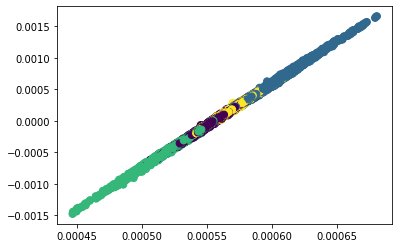

In [47]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')
# save plot to file
plt.savefig(f"{output_dir}/detsec_clustering.pdf", dpi = 150)
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);